In [33]:
import pytesseract
from PIL import Image
import cv2
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'

def ocr(img_path):
    img_cv = cv2.imread(str(img_path)+'.png')
    img_rgb=cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    # img_rgb=cv2.cvtColor(img_cv, cv2.IMREAD_GRAYSCALE)
    config = ('-l kor+eng --oem 3 --psm 4')
    img_pytesseract_en = pytesseract.image_to_string(img_rgb,config=config)
    return print(img_pytesseract_en)


# 14장. 분산분석

## 분선분석이란?

- 분산분석은 3개 이사의 집단의 모평균 차이 검정
- 전체제곱합과 자유도를 처리와 오차로 분할하는 과정
    - $F =\frac {SStr / (k-1)}{SSE / (n-k)} = \frac {MStr}{MSE}$
- 가정 : 정규성, 등분산성, 독립성 
    - 일반적으로 샘플채집이 독립적 수집이기에 독힙성검정 미진행
    - 분산분석을 진행하기전 샘플의 정규성과 등분산성 검정을 통해 가정의 충족여부 확인
- 정규성 검정방법 : Shapiro, Anderson, kstest, QQ Plot, Jaquebera  


## 데이터의 정규성 가정
- $H_0$: 표본 모집단이 정규성을 만족한다
- $H_1$: 표본 모집단이 정규성을 만족하지 않는다

In [2]:
from scipy.stats import norm
import numpy as np
data = norm.rvs(size=100,random_state=0) # 정규성을 만족하는 크기100의 표본

def test(p_value,stats,alpha=0.05):
    print(f'- 검정통계량: {stats:.3f}\n- p_value: {p_value:.3f}')    
    if p_value>alpha:return print(f'- 𝐻0 : 표본 모집단이 정규성을 만족한다')
    else:return print(f'- 𝐻1 : 표본 모집단이 정규성을 만족하지 않는다')
def test1(stats,cv,alpha=0.05):
    print(f'- 검정통계량: {stats:.3f}\n- 유의수준: {cv:.3f}')    
    if p_value>alpha:return print(f'- 𝐻0 : 표본 모집단이 정규성을 만족한다')
    else:return print(f'- 𝐻1 : 표본 모집단이 정규성을 만족하지 않는다')
def shapi_test(data,alpha=0.05):
    stats, p_value = shapiro(data)
    test(stats, p_value)

### Shapiro
- 소규모 표본일 때 (일반적으로 n<50)
- 표본 데이터와 정규분포의 분위수를 비교하여 정규성 여부를 판단
- 표본 크기가 클 경우 검정력이 낮아질 수 있음
- 검정통계량, p-value 반환

In [3]:
from scipy.stats import shapiro
stats, p_value = shapiro(data)
test(stats, p_value) 

- 검정통계량: 0.869
- p_value: 0.993
- 𝐻0 : 표본 모집단이 정규성을 만족한다


### Anderson (Anderson-Darling)
- 표본크기 관계없이 이용
- 경험적 누적분포함수와 이론적 정규분포의 누적분포함수 간의 차이를 측정
- 분포의 꼬리 부분에 더 민감하게 반응
- 통계량, 유의수준의 임계치 (z_alpha) 반환

In [5]:
from scipy.stats import anderson
stats, cv,_ = anderson(data)
test1(stats,cv[2])
anderson(data)

- 검정통계량: 0.181
- 유의수준: 0.759
- 𝐻0 : 표본 모집단이 정규성을 만족한다


AndersonResult(statistic=0.18097695613924714, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

- statistic=0.181: Anderson-Darling 검정통계량. 이 값이 작을수록, 정규분포를 잘 따른다는 것을 의미
- critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]): 유의수준(significance_level)에 해당하는 임계값(critical_values). 
> 검정통계량이 이 값보다 작으면 정규성 만족, 즉 5%의 유의수준 확인시 0.181 < 0.759로 정규성 있음 결론
- significance_level: 유의수준으로, 각각 15%, 10%, 5%, 2.5%, 1%
- fit_result: 데이터에 적합한 정규분포의 매개변수 추정값(위치, 척도)
- success: True: 정규분포 적합이 성공적으로 수행되었음

### kstest (Kolmogorov-Smirnov)
- 표본 크기에 관계없이 사용할 수 있는 검정
- 경험적 누적분포함수와 이론적 정규분포의 누적분포함수 간의 최대 차이를 측정
- 분포의 중심 부분에 더 민감하게 반응

In [6]:
from scipy.stats import kstest, norm
stats, p_value = kstest(data, cdf=norm.cdf)
test(stats, p_value)

- 검정통계량: 0.867
- p_value: 0.058
- 𝐻0 : 표본 모집단이 정규성을 만족한다


### Jaquebera
- 표본의 왜도와 첨도를 이용하여 정규성 여부를 판단
- 왜도와 첨도가 0에 가까울수록 정규분포를 잘 따른다고 판단
- 표본 크기가 클 때 더 효과적

In [7]:
from scipy.stats import jarque_bera
stats, p_value = jarque_bera(data)
test(stats, p_value)

- 검정통계량: 0.742
- p_value: 0.597
- 𝐻0 : 표본 모집단이 정규성을 만족한다


### QQplot과 Histogram
- 시각적인 방법으로, 데이터의 분위수와 이론적 정규분포의 분위수를 그래프로 나타냄
- 데이터가 직선에 가까울수록 정규분포를 잘 따른다고 판단
- 정성적인 평가 방법이며, 다른 검정 방법과 병행 필요

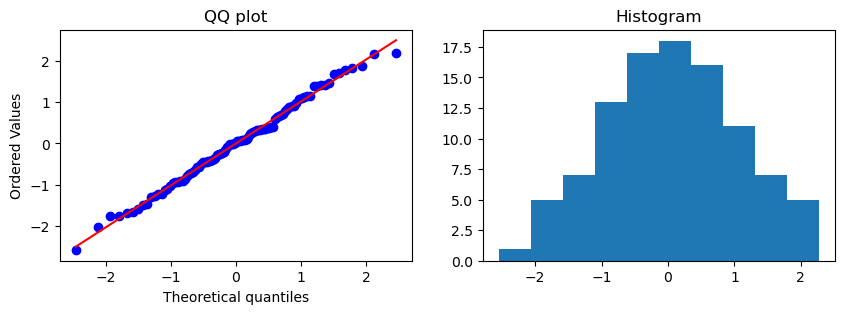

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import zscore, probplot
fig, axes = plt.subplots(1,2,figsize=(10,3))
zdata = zscore(data)

(osm,odr),(slope,intercept,r)=probplot(zdata, plot=axes[0])
axes[0].set_title('QQ plot')

axes[1].hist(data)
axes[1].set_title('Histogram')
plt.show()

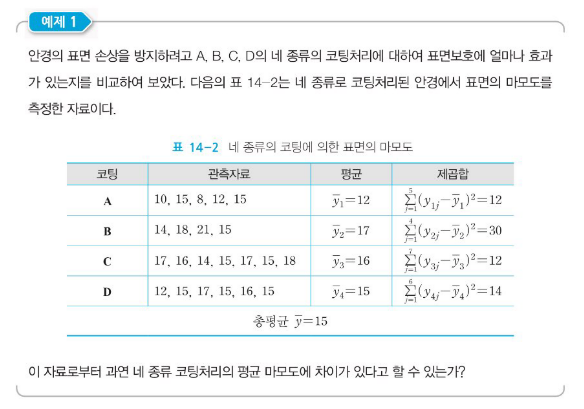

In [52]:
#코 팅 처 리 의 평균 마 모 도에 차 이 가 있 다 고 할 수 있 는 가
import numpy as np
A = np.array([10, 15, 8, 12, 15])
B = np.array([14, 18, 21, 15])
C = np.array( [17,16, 14,15, 17,15, 18])
D = np.array( [12, 15, 17, 15, 16, 15])
data = [A, B, C, D]

max_len = max(len(A), len(B), len(C), len(D))
A_ = np.pad(A, (0, max_len - len(A)))
B_ = np.pad(B, (0, max_len - len(B)))
C_ = np.pad(C, (0, max_len - len(C)))
D_ = np.pad(D, (0, max_len - len(D)))
data_ = np.array([A_, B_, C_, D_])

In [53]:
# 네 집단의 정규성부터 확인
for a in data : 
    print(a)
    shapi_test(a)
    print()

[10 15  8 12 15]
- 검정통계량: 0.429
- p_value: 0.903
- 𝐻0 : 표본 모집단이 정규성을 만족한다

[14 18 21 15]
- 검정통계량: 0.653
- p_value: 0.940
- 𝐻0 : 표본 모집단이 정규성을 만족한다

[17 16 14 15 17 15 18]
- 검정통계량: 0.752
- p_value: 0.952
- 𝐻0 : 표본 모집단이 정규성을 만족한다

[12 15 17 15 16 15]
- 검정통계량: 0.238
- p_value: 0.873
- 𝐻0 : 표본 모집단이 정규성을 만족한다



In [23]:
import numpy as np

A = np.array([10, 15, 8, 12, 15])
B = np.array([14, 18, 21, 15])
C = np.array([17, 16, 14, 15, 17, 15, 18])
D = np.array([12, 15, 17, 15, 16, 15])

# 전체 데이터를 하나의 배열로 합치기
data = np.concatenate((A, B, C, D))

# 전체 데이터의 평균 계산
mean = np.mean(data)

# 각 데이터 값에서 평균을 뺀 값을 제곱하고 합산
sst = np.sum((data - mean)**2)

print(f"Sum of Squared Differences (SST): {sst}")

Sum of Squared Differences (SST): 162.0


In [35]:
import numpy as np

def f_test(lis):
    samples = np.concatenate([e for e in lis]) 
    y_bar = samples.mean()
    n, k = len(samples),len(lis)

    SST = np.sum(np.array([(data - mean)**2 for data in samples])) # 각각의 요소 - 전체평균
    SStr = np.sum([len(sample) * (sample.mean() - y_bar)**2 for sample in lis]) # (각샘플평균 -전체평균).sum()
    SSE = SST - SStr  # 집단 내 제곱합
    
    df_tr = k - 1  # 집단 간 자유도
    df_e = n - k  # 집단 내 자유도    
    
    MStr = SStr / df_tr
    MSE = SSE / df_e
    if MSE == 0:
        f_score = 0  # 또는 f_score = None
    else:
        f_score = MStr / MSE
    
    return f_score

f_test(data)

4.340425531914894

- Library

In [30]:
import numpy as np
from scipy.stats import f_oneway

# f_oneway 함수를 사용하여 분산분석 수행
stats, p_value = f_oneway(*data)
print(f'F 통계량: {stats:.3f}')
print(f'p-value: {p_value:.3f}' )
if p_value<0.05:
    print('p-value가 0.05 미만이므로 집단 간 평균에 유의한 차이가 있다')
else:
    print(f'p-value는 {p_value}로 0.05보다 크므로, 네 표면 코팅 처리 간의 마모도에 유의한 차이가 없다고 할 수 있다')
# 따라서 이 자료로부터는 네 표면 코팅 처리의 마모도에 차이가 있다고 할 수 없습니다.

F 통계량: 4.340
p-value: 0.018
p-value가 0.05 미만이므로 집단 간 평균에 유의한 차이가 있다


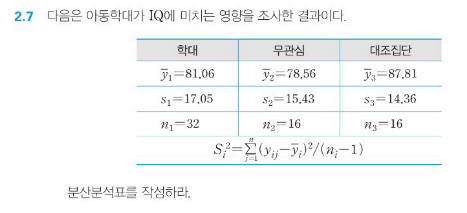

In [31]:
# 데이터 준비
import numpy as np
import pandas as pd
from scipy.stats import f


df = pd.DataFrame({
    'y':[ 81.06, 78.56, 87.81],
    's':[17.05,15.43,14.35],
    'n':[32, 16, 16]
})
y_bar = df['y'].mean()

N = df['n'].sum()
df_tr = len(df)-1
df_e = N - len(df)

SSE = (df['s']**2 * (df['n']-1)).sum()
SStr = (df['n'] * (df['y']-y_bar)**2).sum()
SST = SSE + SStr

MStr = SStr/df_tr
MSE = SSE/df_e
F_stat = MStr/MSE
p_value = 1 - f.cdf(F_stat, MStr, MSE)

# 분산분석표 작성
print('분산분석표:')
print('---------------------------------------')
print('          제곱합    자유도    평균제곱')
print('---------------------------------------')
print(f'집단 간:  {SStr:8.2f}    {df_tr:2d}    {MStr:8.2f}')
print(f'집단 내:  {SSE:8.2f}    {df_e:2d}    {MSE:8.2f}')
print('---------------------------------------')
print(f'전체:     {SST:8.2f}    {N-1:2d}')
print('---------------------------------------')
print(f'F 통계량: {F_stat:8.2f}')
print(f'p-value: {p_value:8.2f}')
print('세집단간 통계적으로 유의하게 차이가 있다')

분산분석표:
---------------------------------------
          제곱합    자유도    평균제곱
---------------------------------------
집단 간:    764.78     2      382.39
집단 내:  15671.89    61      256.92
---------------------------------------
전체:     16436.67    63
---------------------------------------
F 통계량:     1.49
p-value:     0.00


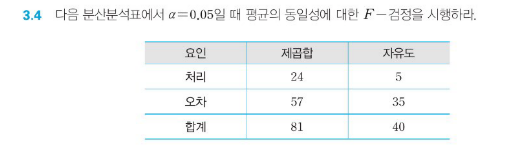

In [60]:
import numpy as np
from scipy.stats import f

# 분산분석표 데이터
SST = 24 + 57  # 전체 제곱합
SStr = 24  # 처리 제곱합
SSE = 57  # 오차 제곱합
df_tr = 5  # 처리 자유도
df_E = 35  # 오차 자유도

# 평균제곱 계산
MStr = SStr / df_tr  # 처리 평균제곱
MSE = SSE / df_E  # 오차 평균제곱

# F 통계량 계산
F_stat = MStr / MSE

# p-value 계산
p_value = 1 - f.cdf(F_stat, MStr, MSE)

# 결과 출력
print(f'F 통계량: {F_stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print('처리 효과가 있습니다. (귀무가설 기각)')
else:
    print('처리 효과가 없습니다. (귀무가설 채택)')

F 통계량: 2.9474
p-value: 0.3118
처리 효과가 없습니다. (귀무가설 채택)


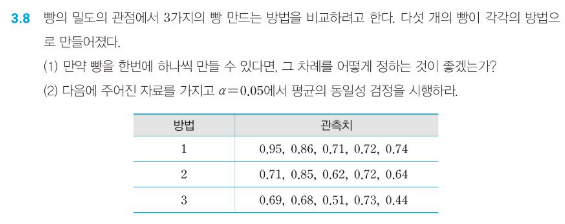

In [34]:
x1 =np.array([0.95, 0.86, 0.71, 0.72, 0.74])
x2 = np.array([0.71, 0.85, 0.62, 0.72, 0.64])
x3 = np.array([0.69, 0.68, 0.51, 0.73, 0.44])
# 각 방법별 평균 밀도 계산
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
mean_x3 = np.mean(x3)

# 평균 밀도를 내림차순으로 정렬
print(mean_x1, mean_x2, mean_x3)
#만약 빵을 한 번에 하나씩 만들 수 있다면, 밀도가 높은 순서대로 만드는 것이 좋습니다. 밀도가 높을수록 빵의 질이 좋기 때문

0.796 0.7080000000000001 0.6100000000000001


In [37]:
import numpy as np
from scipy.stats import f_oneway

# 일원분산분석 수행
F_statistic, p_value = f_oneway(x1, x2, x3)

print('F 통계량:', F_statistic)
print('p-value:', p_value)

# 유의수준 0.05에서 평균 동일성 검정
alpha = 0.05
if p_value < alpha:
    print('세 집단의 평균은 서로 다릅니다.')
else:
    print('세 집단의 평균이 서로 다르다고 할수 있는 근거가 없다.')

F 통계량: 3.673550212164073
p-value: 0.056936682749905085
세 집단의 평균이 서로 다르다고 할수 있는 근거가 없다.


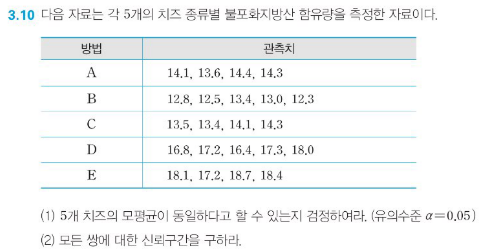

In [11]:
# (1) 5개 치즈의 모평균이 동일한지 검정하기 위해 일원분산분석(One-way ANOVA)을 수행
import numpy as np
from scipy.stats import f_oneway

A = np.array([14.1, 13.6, 14.4, 14.3])
B = np.array([12.8, 12.5, 13.4, 13.0, 12.3])
C = np.array([13.5, 13.4, 14.1, 14.3])
D = np.array([16.8, 17.2, 16.4, 17.3, 18.0])
E = np.array([18.1, 17.2, 18.7, 18.4])

data = [A, B, C, D, E]
F_statistic, p_value = f_oneway(*data)

print('F 통계량:', F_statistic)
print('p-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('5개 치즈의 모평균은 동일하지 않습니다.')
else:
    print('5개 치즈의 모평균은 동일합니다.')

F 통계량: 90.46200239696621
p-value: 3.1753418448329426e-11
5개 치즈의 모평균은 동일하지 않습니다.


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -1.3 0.0106 -2.3383 -0.2617   True
     A      C   -0.275 0.9373 -1.3694  0.8194  False
     A      D     3.04    0.0  2.0017  4.0783   True
     A      E      4.0    0.0  2.9056  5.0944   True
     B      C    1.025 0.0539 -0.0133  2.0633  False
     B      D     4.34    0.0  3.3611  5.3189   True
     B      E      5.3    0.0  4.2617  6.3383   True
     C      D    3.315    0.0  2.2767  4.3533   True
     C      E    4.275    0.0  3.1806  5.3694   True
     D      E     0.96 0.0775 -0.0783  1.9983  False
----------------------------------------------------


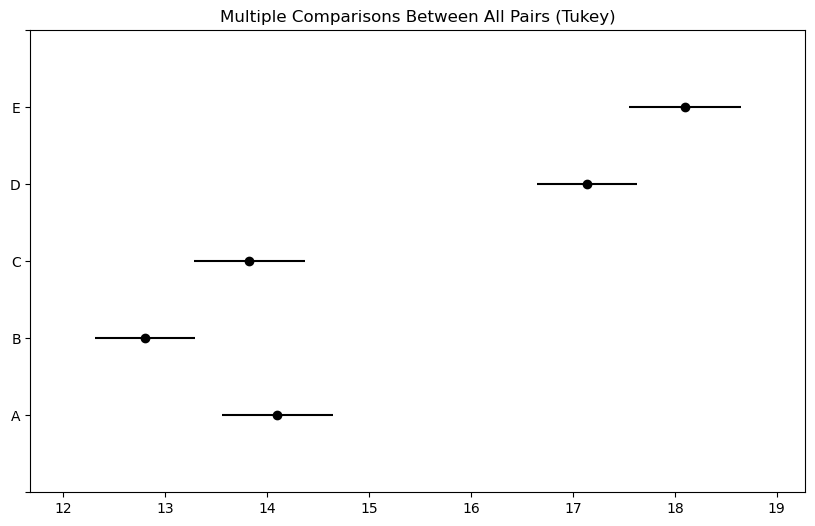

In [16]:
# (2) 모든 쌍에 대한 신뢰구간을 구하기 위해 Tukey의 다중비교를 수행합
import statsmodels.stats.multicomp as multi

# 데이터 준비
data = np.concatenate([A, B, C, D, E])
groups = np.array(['A']*len(A) + ['B']*len(B) + ['C']*len(C) + ['D']*len(D) + ['E']*len(E))
# Tukey의 다중비교 수행
mc = multi.MultiComparison(data,groups)
res = mc.tukeyhsd()
print(res.summary())
res.plot_simultaneous();

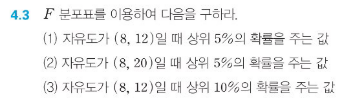

In [37]:
from scipy.stats import f

# (1) 자유도가 (8, 12)일 때 하위 5%의 확률을 갖는 F 값
f_value_1 = f.ppf(0.05, 8, 12)
print(f"(1) 자유도 (8, 12)일 때 하위 5%의 F 값: {f_value_1:.4f}")

# (2) 자유도가 (8, 20)일 때 상위 5%의 확률을 갖는 F 값
f_value_2 = f.isf(0.05, 8, 20)
print(f"(2) 자유도 (8, 20)일 때 상위 5%의 F 값: {f_value_2:.4f}")

# (3) 자유도가 (8, 12)일 때 상위 10%의 확률을 갖는 F 값
f_value_3 = f.isf(0.1, 8, 12)
print(f"(3) 자유도 (8, 12)일 때 상위 10%의 F 값: {f_value_3:.4f}")

(1) 자유도 (8, 12)일 때 하위 5%의 F 값: 0.3045
(2) 자유도 (8, 20)일 때 상위 5%의 F 값: 2.4471
(3) 자유도 (8, 12)일 때 상위 10%의 F 값: 2.2446


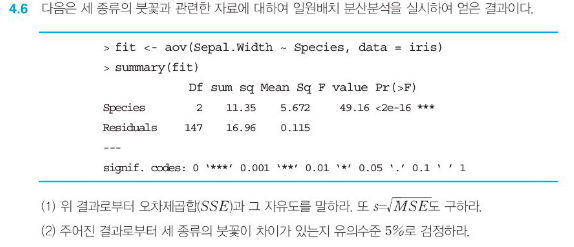

(1) 오차 제곱합(SSE), 자유도, RMSE

In [64]:
SSE = 16.96
df = 147
RMSE = (SSE / df) ** 0.5
print(f'오차 제곱합(SSE): {SSE}, 자유도: {df}, RMSE: {RMSE:.3f}')

오차 제곱합(SSE): 16.96, 자유도: 147, RMSE: 0.340


(2) 세종류의 붓꽃차이있는지 유의수준 5%로 검정

- p-value가 2e-16으로 유의수준 0.05보다 작기에 유의한 차이가 있다고 볼 수 있다